# Austrailia rainforest forecast

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기 및 확인

In [2]:
df=pd.read_csv('/Users/jijoonghong/Downloads/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
# 요약 통계량
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## 결측치 확인

In [5]:
# 결측치 확인
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
# 결측률 확인
(df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)

Sunshine         48.009762
Evaporation      43.166506
Cloud3pm         40.807095
Cloud9am         38.421559
Pressure9am      10.356799
Pressure3pm      10.331363
WindDir9am        7.263853
WindGustDir       7.098859
WindGustSpeed     7.055548
Humidity3pm       3.098446
WindDir3pm        2.906641
Temp3pm           2.481094
RainTomorrow      2.245978
Rainfall          2.241853
RainToday         2.241853
WindSpeed3pm      2.105046
Humidity9am       1.824557
Temp9am           1.214767
WindSpeed9am      1.214767
MinTemp           1.020899
MaxTemp           0.866905
Location          0.000000
Date              0.000000
dtype: float64

## feature analysis & eda

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64


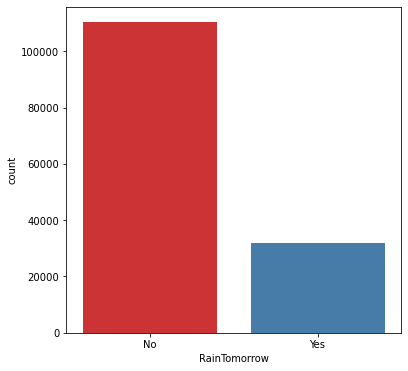

In [7]:
# 타겟값 분포 확인
print(df['RainTomorrow'].value_counts())
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

In [8]:
# 'RainTomorrow' 'yes'=1, 'no'=0으로 변환
df['RainTomorrow']=df['RainTomorrow'].apply(lambda x: 1 if(x=='Yes') else 0)
df['RainTomorrow'].value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

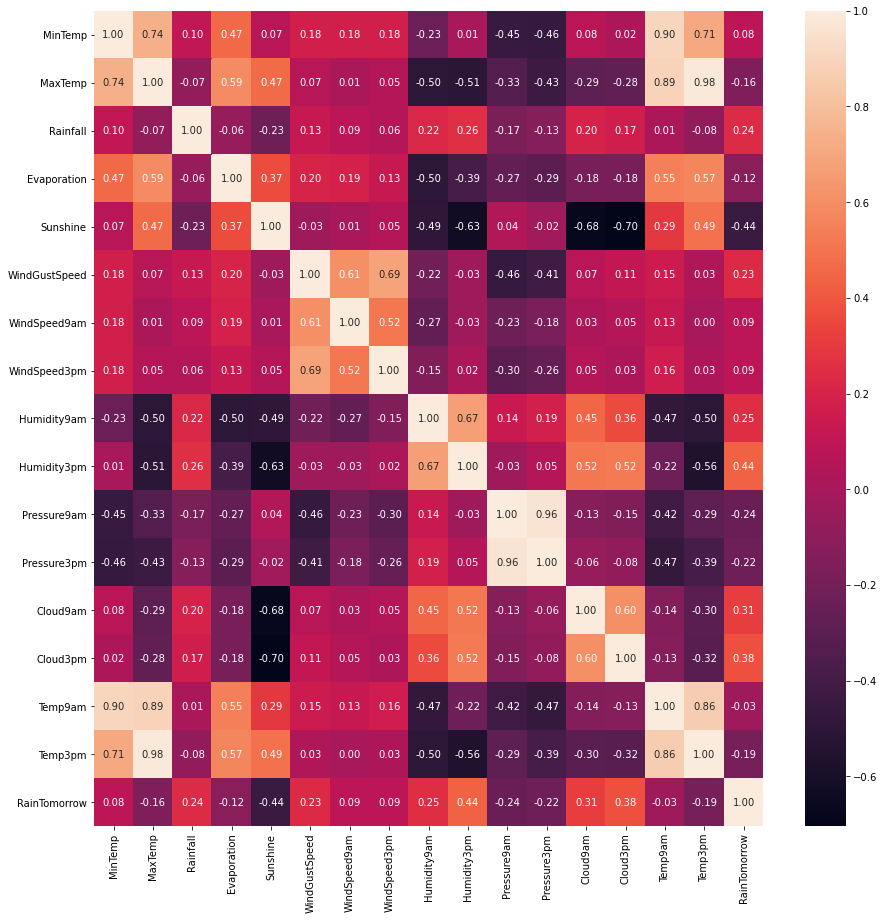

In [9]:
# 상관계수 확인
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr, annot=True, fmt='.2f')
plt.show()

### - categorical feature('Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday')

In [10]:
categorical_ftr=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [11]:
# 결측치 확인
df[categorical_ftr].isnull().sum()

#최빈값 혹은 NaN으로 채워서 테스트 해보기 

Date               0
Location           0
WindGustDir    10326
WindDir9am     10566
WindDir3pm      4228
RainToday       3261
dtype: int64

In [12]:
# 'Location' 분포 확인
df['Location'].value_counts(dropna=False)

Canberra            3436
Sydney              3344
Hobart              3193
Perth               3193
Melbourne           3193
Brisbane            3193
Darwin              3193
Adelaide            3193
Ballarat            3040
Townsville          3040
MountGinini         3040
Bendigo             3040
MountGambier        3040
AliceSprings        3040
Albany              3040
GoldCoast           3040
Cairns              3040
Launceston          3040
Wollongong          3040
Albury              3040
Tuggeranong         3039
Newcastle           3039
Penrith             3039
Portland            3009
NorfolkIsland       3009
CoffsHarbour        3009
Dartmoor            3009
MelbourneAirport    3009
Watsonia            3009
Cobar               3009
Sale                3009
Nuriootpa           3009
BadgerysCreek       3009
PearceRAAF          3009
WaggaWagga          3009
Mildura             3009
Moree               3009
Williamtown         3009
SydneyAirport       3009
PerthAirport        3009


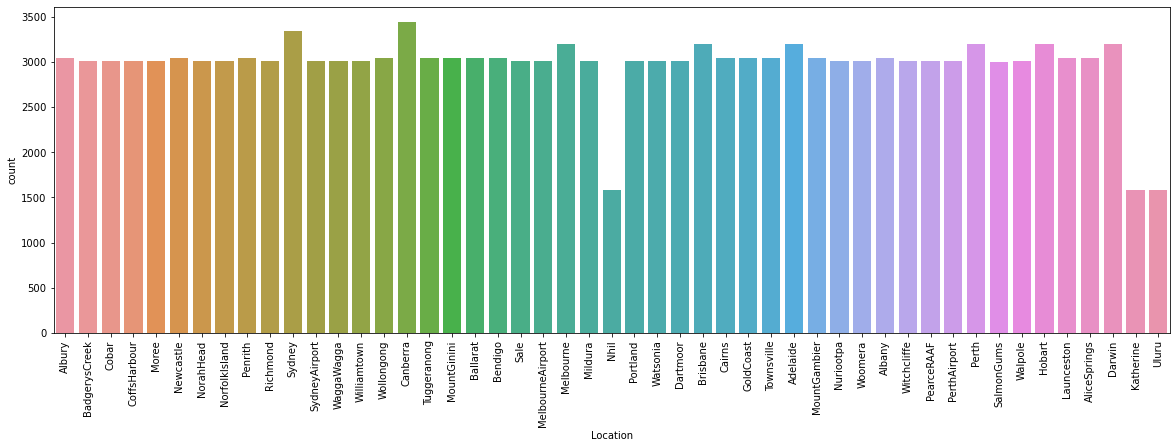

In [13]:
# 'Location' 분포 시각화
plt.figure(figsize=(20,6))
sns.countplot(x='Location', data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

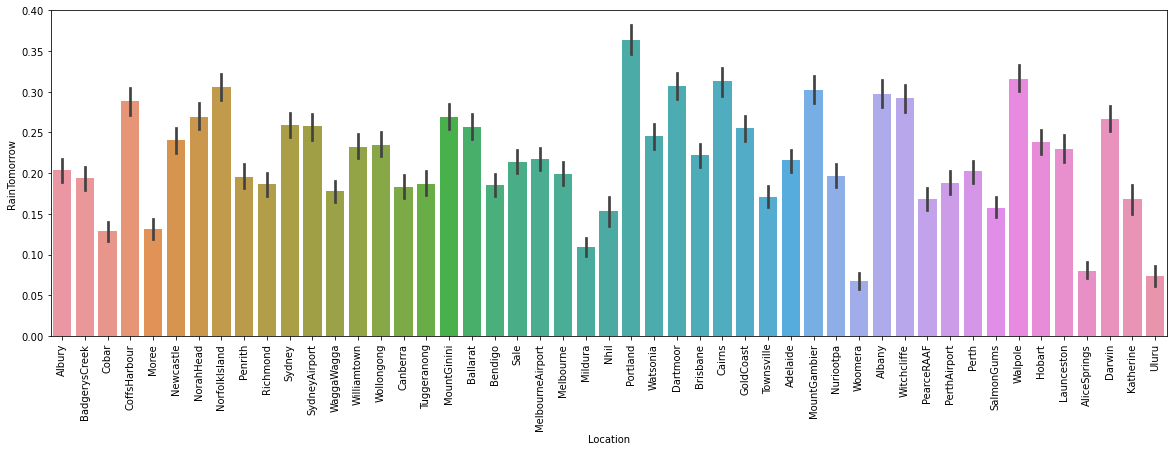

In [14]:
# 'Location'과 'RainTomorrow' 분포 시각화
plt.figure(figsize=(20,6))
sns.barplot(x='Location',y="RainTomorrow", data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

In [15]:
# 'WindGustDir' 분포 확인
df['WindGustDir'].value_counts(dropna=False)

NaN    10326
W       9915
SE      9418
N       9313
SSE     9216
E       9181
S       9168
WSW     9069
SW      8967
SSW     8736
WNW     8252
NW      8122
ENE     8104
ESE     7372
NE      7133
NNW     6620
NNE     6548
Name: WindGustDir, dtype: int64

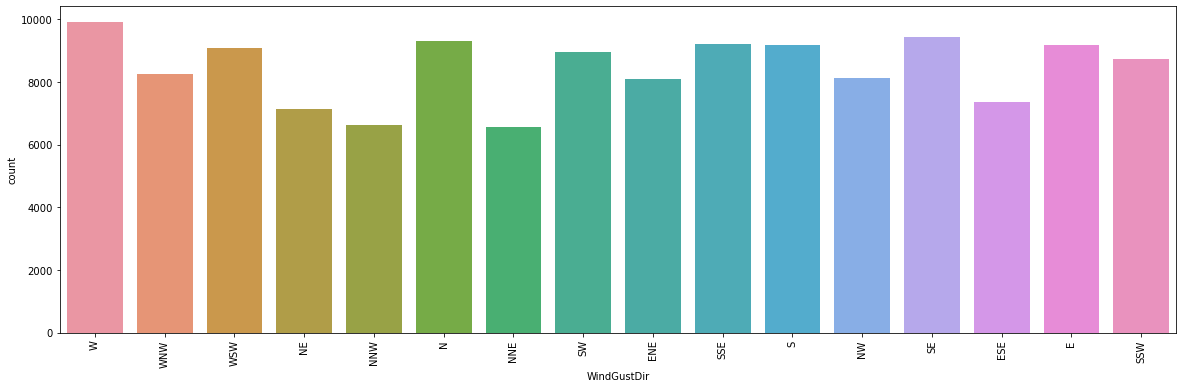

In [16]:
# 'WindGustDir' 분포 시각화
plt.figure(figsize=(20,6))
sns.countplot(x='WindGustDir', data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

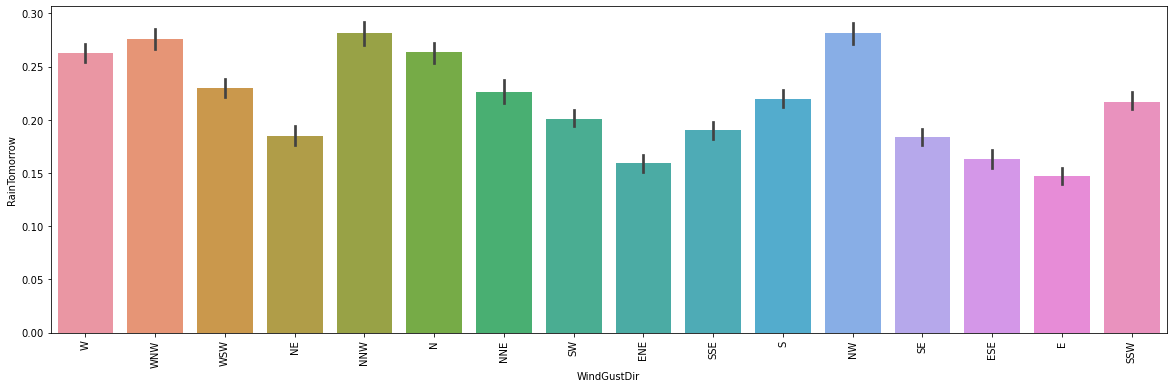

In [17]:
# 'WindGustDir'과 'RainTomorrow' 분포 시각화
plt.figure(figsize=(20,6))
sns.barplot(x='WindGustDir',y="RainTomorrow", data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

In [18]:
# 'WindDir9am' 분포 확인
df['WindDir9am'].value_counts(dropna=False)

N      11758
NaN    10566
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

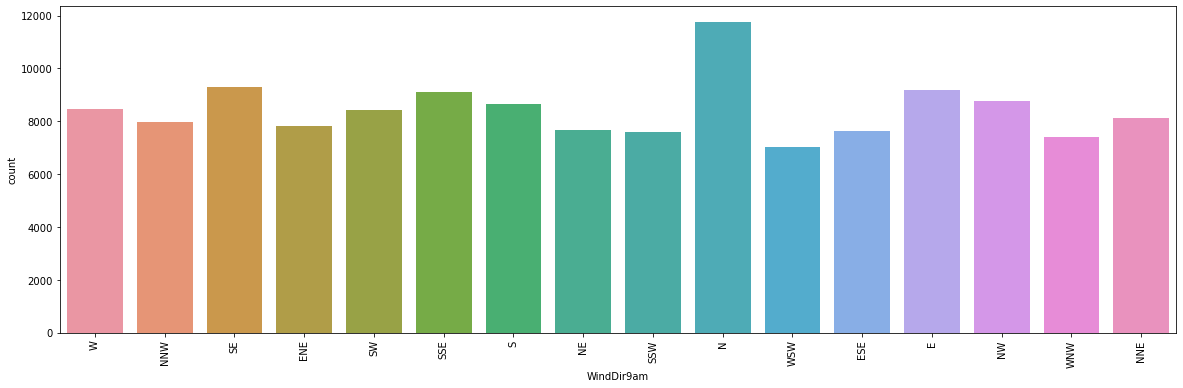

In [19]:
# 'WindDir9am' 분포 시각화
plt.figure(figsize=(20,6))
sns.countplot(x='WindDir9am', data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

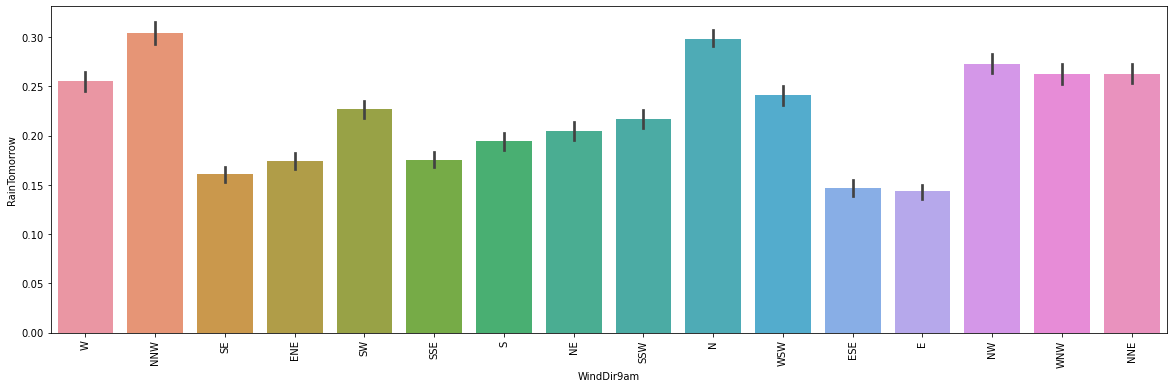

In [20]:
# 'WindDir9am'과 'RainTomorrow' 분포 시각화
plt.figure(figsize=(20,6))
sns.barplot(x='WindDir9am',y="RainTomorrow", data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

In [21]:
# 'WindDir3pm' 분포 확인
df['WindDir3pm'].value_counts(dropna=False)

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
NaN     4228
Name: WindDir3pm, dtype: int64

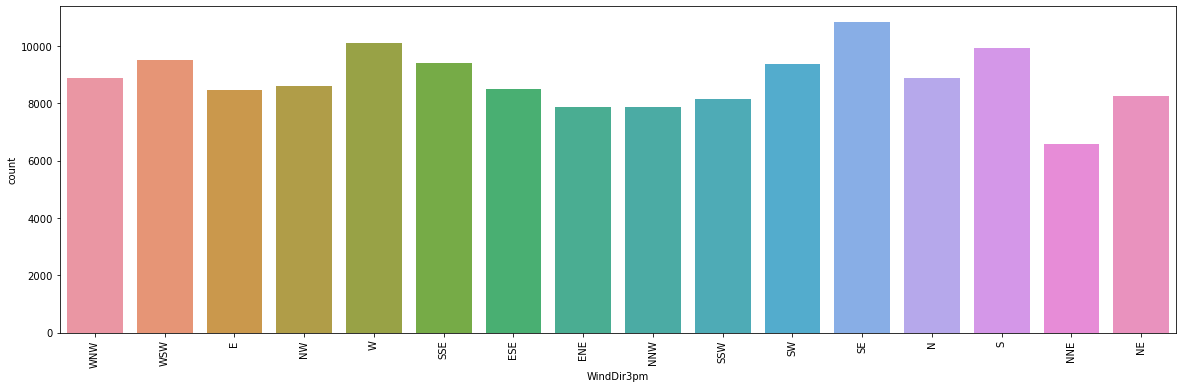

In [22]:
# 'WindDir3pm'  분포 시각화
plt.figure(figsize=(20,6))
sns.countplot(x='WindDir3pm' , data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

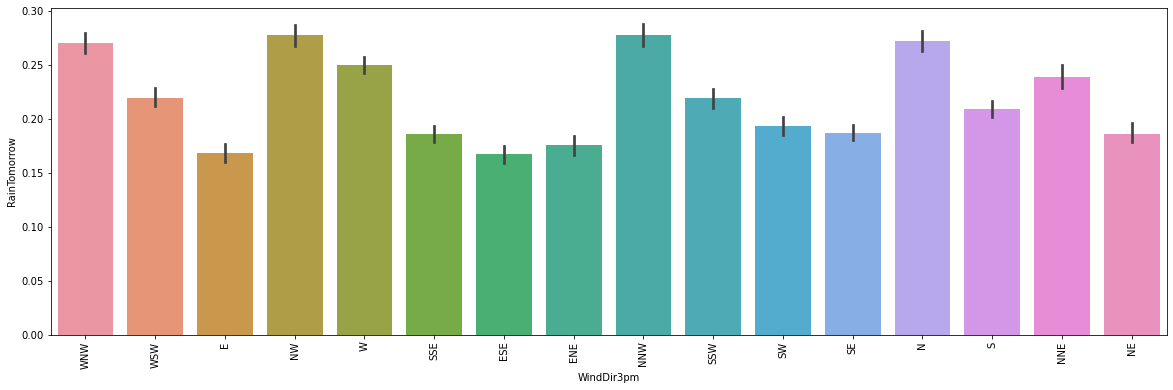

In [23]:
# 'WindDir3pm'과 'RainTomorrow' 분포 시각화
plt.figure(figsize=(20,6))
sns.barplot(x='WindDir3pm',y="RainTomorrow", data=df)
plt.xticks(size=10, rotation='vertical')
plt.show()

In [24]:
# 'RainToday' 분포 확인
df['RainToday'].value_counts(dropna=False)

No     110319
Yes     31880
NaN      3261
Name: RainToday, dtype: int64

In [25]:
# 'RainToday' 'yes'=1, 'no'=0으로 변환
df['RainToday']=df['RainToday'].apply(lambda x: 1 if(x=='Yes') else 0)
df['RainToday'].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

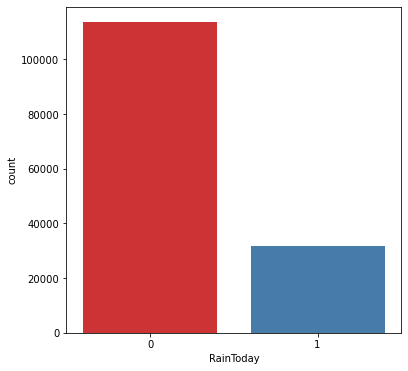

In [26]:
# 'RainToday' 분포 시각화
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(x='RainToday', data=df, palette="Set1")
plt.show()

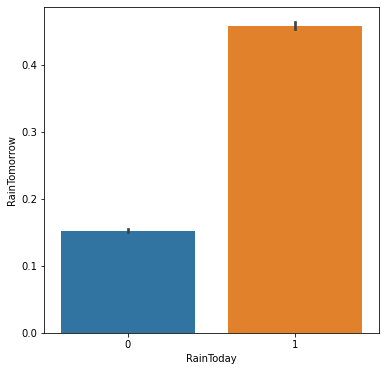

In [27]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.barplot(x='RainToday',y="RainTomorrow", data=df)
plt.xticks(size=10)
plt.show()

In [28]:
# 'Date' 분포 확인
df['Date'].value_counts()

2013-09-20    49
2013-09-30    49
2013-03-22    49
2013-07-05    49
2014-06-28    49
              ..
2007-11-21     1
2007-11-10     1
2007-11-13     1
2007-12-07     1
2007-12-08     1
Name: Date, Length: 3436, dtype: int64

In [29]:
# 'Date' datetime type으로 바꾸고 연, 월, 일 피처 생성
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [30]:
# 'Date' 삭제
df.drop('Date', axis=1, inplace = True)

In [31]:
# 'Year' 분포 확인
df['Year'].value_counts(dropna=False)

2016    17934
2014    17885
2015    17885
2009    16789
2010    16782
2013    16415
2012    15409
2011    15407
2017     8623
2008     2270
2007       61
Name: Year, dtype: int64

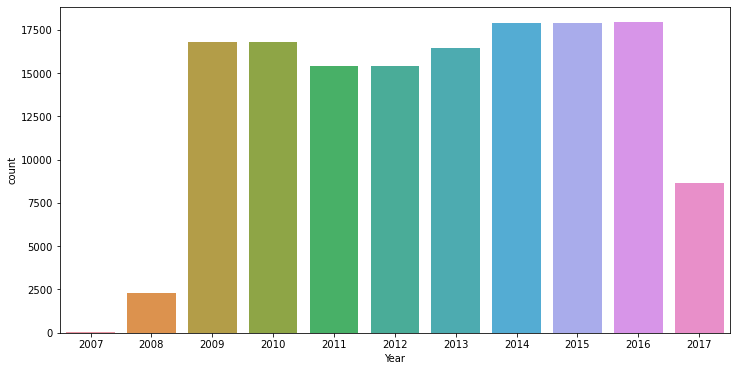

In [32]:
# 'Year' 분포 시각화
plt.figure(figsize=(12,6))
sns.countplot(x='Year', data=df)
plt.show()

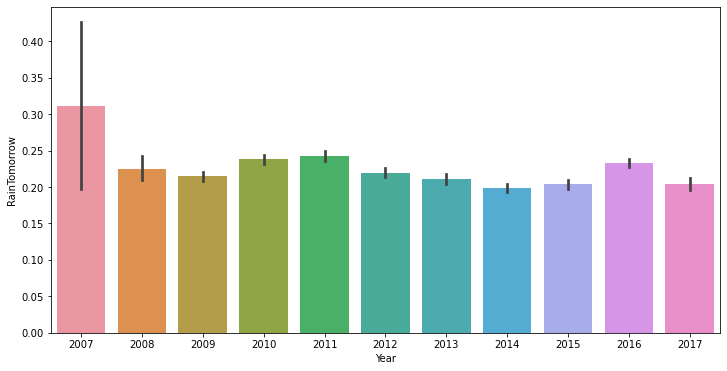

In [33]:
# 'Year' 와 'RainTomorrow' 분포 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y= 'RainTomorrow', data=df)
plt.show()

In [34]:
# 'Month' 분포 확인
df['Month'].value_counts(dropna=False)

3     13361
5     13353
1     13236
6     12684
8     12028
10    12028
7     12025
11    11669
9     11640
4     11550
12    11093
2     10793
Name: Month, dtype: int64

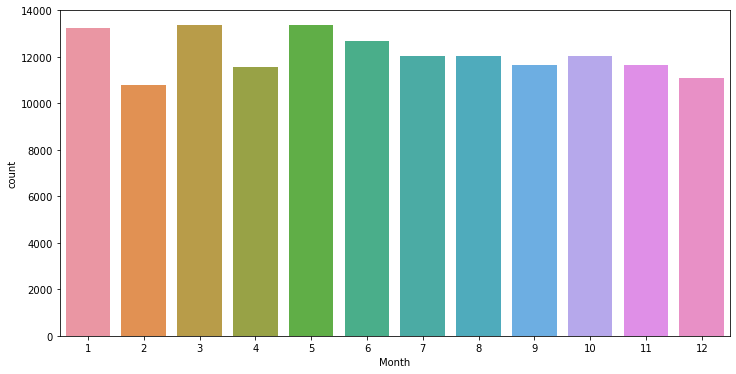

In [35]:
# 'Month' 분포 시각화
plt.figure(figsize=(12,6))
sns.countplot(x='Month', data=df)
plt.show()

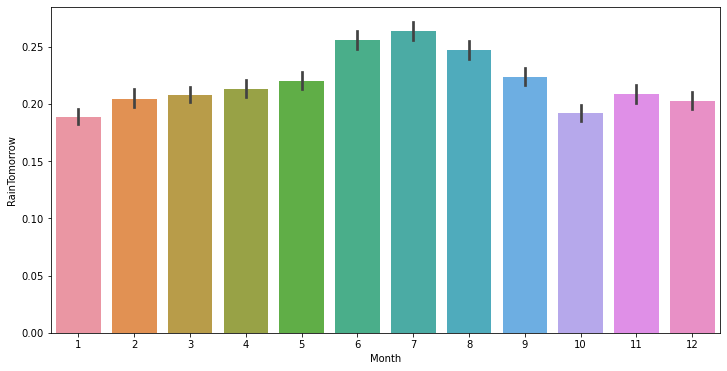

In [36]:
# 'Month' 와 'RainTomorrow' 분포 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='Month',y= 'RainTomorrow', data=df)
plt.show()

In [37]:
# 'Day' 분포 확인
df['Day'].value_counts(dropna=False)

1     4786
13    4786
23    4786
22    4786
21    4786
20    4786
19    4786
18    4786
17    4786
2     4786
15    4786
14    4786
16    4786
12    4786
6     4786
11    4786
4     4786
5     4786
3     4786
7     4786
8     4786
9     4786
10    4786
24    4785
25    4784
26    4736
27    4735
28    4735
29    4449
30    4351
31    2807
Name: Day, dtype: int64

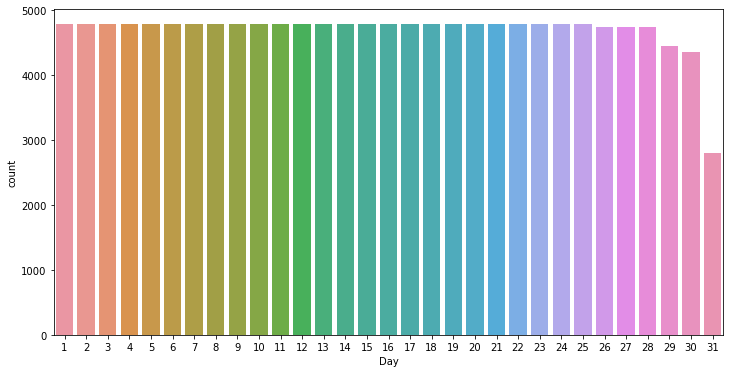

In [38]:
# 'Day' 분포 시각화
plt.figure(figsize=(12,6))
sns.countplot(x='Day', data=df)
plt.show()

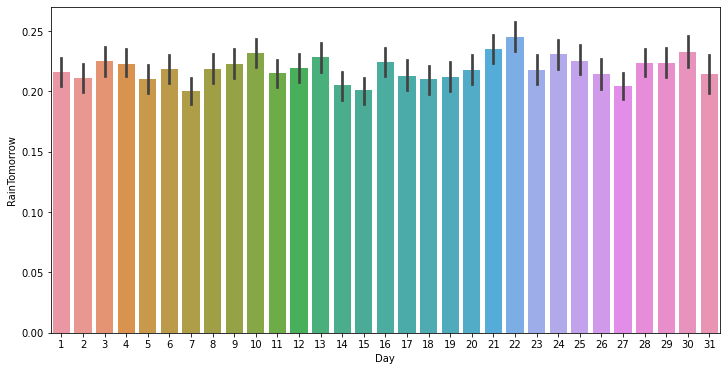

In [39]:
# 'Day' 와 'RainTomorrow' 분포 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='Day' ,y= 'RainTomorrow', data=df)
plt.show()

### - numerical feature('MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm')

In [40]:
numerical_ftr=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

In [41]:
# 요약통계량 확인(Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm) 이상치 있을 것으로 예상
print(round(df[numerical_ftr].describe(), 2))

         MinTemp    MaxTemp   Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.00  144199.00  142199.00     82670.00  75625.00      135197.00   
mean       12.19      23.22       2.36         5.47      7.61          40.04   
std         6.40       7.12       8.48         4.19      3.79          13.61   
min        -8.50      -4.80       0.00         0.00      0.00           6.00   
25%         7.60      17.90       0.00         2.60      4.80          31.00   
50%        12.00      22.60       0.00         4.80      8.40          39.00   
75%        16.90      28.20       0.80         7.40     10.60          48.00   
max        33.90      48.10     371.00       145.00     14.50         135.00   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count     143693.00     142398.00    142806.00    140953.00    130395.00   
mean          14.04         18.66        68.88        51.54      1017.65   
std            8.92          8.81        19.03     

Text(0, 0.5, 'WindSpeed3pm')

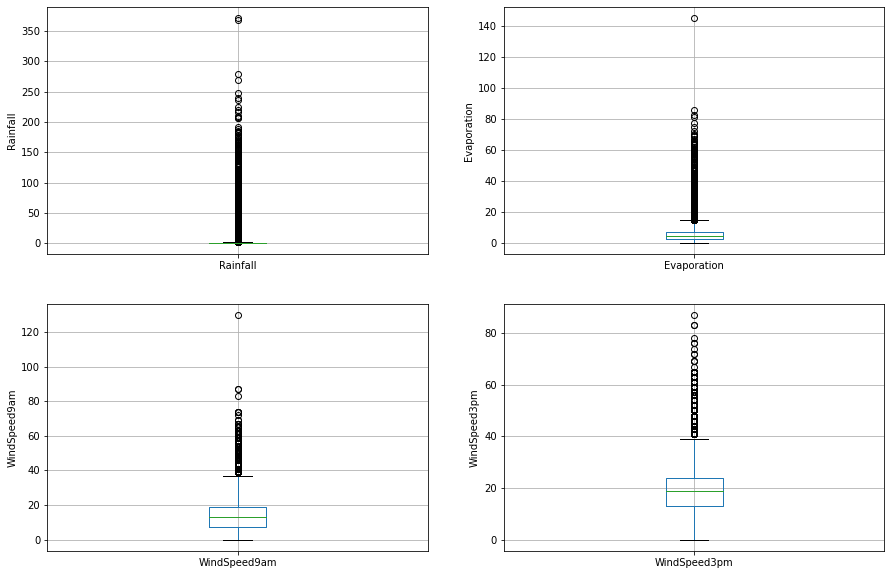

In [42]:
# boxplot(Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm)
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

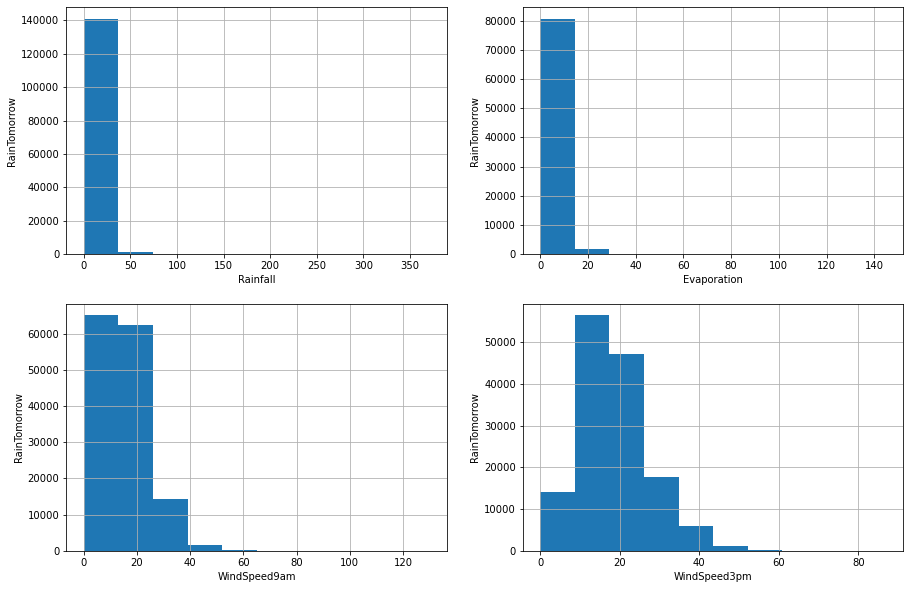

In [43]:
# (Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm) 분포 확인
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [44]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0,0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0,0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0,0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0,0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,1020.3,NaN,NaN,10.1,22.4,0,0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,1019.1,NaN,NaN,10.9,24.5,0,0,2017,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,1016.8,NaN,NaN,12.5,26.1,0,0,2017,6,23
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,1016.5,3.0,2.0,15.1,26.0,0,0,2017,6,24


#### - Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm 칼럼 이상치 확인

In [48]:
# Rainfall outliers(over 3.2)
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)

Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
search_df = df[((df['Rainfall'] < (Lower_fence)) | (df['Rainfall'] > (Upper_fence)))]
search_df





Rainfall outliers are values < -2.4000000000000004 or > 3.2


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
12,Albury,15.9,18.6,15.6,NaN,NaN,W,61.0,NNW,NNW,...,993.0,8.0,8.0,17.4,15.8,1,1,2008,12,13
13,Albury,12.6,21.0,3.6,NaN,NaN,SW,44.0,W,SSW,...,1001.8,NaN,7.0,15.8,19.8,1,0,2008,12,14
17,Albury,13.5,22.9,16.8,NaN,NaN,W,63.0,N,WNW,...,1002.2,8.0,1.0,18.0,21.5,1,1,2008,12,18
18,Albury,11.2,22.5,10.6,NaN,NaN,SSE,43.0,WSW,SW,...,1009.7,NaN,2.0,15.5,21.0,1,0,2008,12,19
53,Albury,18.8,35.2,6.4,NaN,NaN,WNW,52.0,S,NW,...,1003.9,NaN,NaN,22.8,33.0,1,0,2009,1,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145325,Uluru,22.2,39.4,6.2,NaN,NaN,S,30.0,S,W,...,1004.9,NaN,4.0,28.6,38.7,1,0,2017,2,11
145391,Uluru,15.2,21.5,6.8,NaN,NaN,ENE,30.0,NE,ENE,...,1015.3,3.0,8.0,19.0,21.2,1,1,2017,4,18
145392,Uluru,17.7,26.9,12.6,NaN,NaN,S,35.0,E,SSW,...,1014.7,7.0,8.0,19.0,26.0,1,1,2017,4,19
145393,Uluru,18.6,28.6,34.6,NaN,NaN,E,46.0,E,E,...,1015.8,8.0,5.0,19.8,26.9,1,1,2017,4,20


In [46]:
# Evaporation outliers(>21.8)
#IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
#Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
#Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
#print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [47]:
# WindSpeed9am outliers(>55)
#IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
#Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
#Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
#print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

In [48]:
# WindSpeed3pm outliers(>57)
#IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
#Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
#Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
#print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

## feature engineering

In [49]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
search_df = df[((df['Rainfall'] < (Lower_fence)) | (df['Rainfall'] > (Upper_fence))]
df = df.drop(search_df.index, axis=0)

In [50]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
search_df = df[(df['Evaporation'] < (Lower_fence)) | (df['Evaporation'] > (Upper_fence))]
df = df.drop(search_df.index, axis=0)

In [51]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
search_df = df[(df['WindSpeed3pm'] < (Lower_fence)) | (df['WindSpeed3pm'] > (Upper_fence))]
df = df.drop(search_df.index, axis=0)

In [52]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
search_df = df[(df['WindSpeed9am'] < (Lower_fence)) | (df['WindSpeed9am'] > (Upper_fence))]
df = df.drop(search_df.index, axis=0)

KeyError: "None of [Index(['Rainfall'], dtype='object')] are in the [columns]"

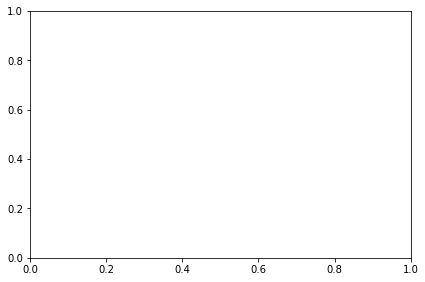

In [62]:
# boxplot(Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm)
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

### - 결측치 처리

### -categorical 결측치 처리

방향바람 -> nan or 최빈값!!!!!!!!!!!!

rain today 결측치 최빈값

year day 삭제

In [63]:
df['WindDir9am'].fillna(df['WindDir9am'].mode(), inplace = True)

In [64]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode(), inplace = True)

In [65]:
df['WindGustDir'].fillna(df['WindGustDir'].mode(), inplace = True)

In [66]:
df["RainToday"].fillna(df['RainToday'].mode(), inplace = True)

In [67]:
df.drop(['Year', 'Day'], axis=1, inplace = True)

KeyError: "['Year' 'Day'] not found in axis"

### - numeric 결측치 처리

중앙값 -> 정규분포를 따른다면 큰 상관이 없기 때문에



In [60]:
numerical_ftr=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for ftr in numerical_ftr:
    df[ftr].fillna(df[ftr].median, inplace = True)


In [68]:
df

RecursionError: maximum recursion depth exceeded

RecursionError: maximum recursion depth exceeded

### - 이상치 제거

삭제

KeyError: "None of [Index(['Rainfall'], dtype='object')] are in the [columns]"

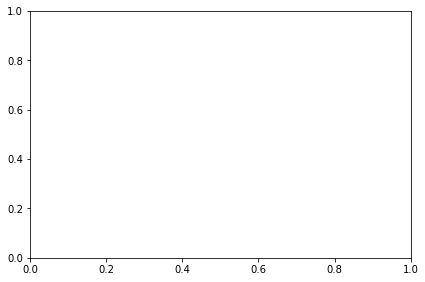

In [59]:
# boxplot(Rainfall, Evaporation, WindSpeed9am, WindSpeed3pm)
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am') 


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')


### - encoding

In [60]:
def add_column_prefixes(data, column, prefix):
    return data[column].apply(lambda x: prefix + str(x))

df['WindDir9am'] = add_column_prefixes(df, 'WindDir9am', '9_')
df['WindDir3pm'] = add_column_prefixes(df, 'WindDir3pm', '3_')

In [61]:
df_object = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Month']

for col in df_object:
    d = pd.get_dummies(df[col], drop_first=True)
    df.drop(col, axis=1, inplace=True)
    df = pd.concat((df,d), axis=1)

### - scaling

In [63]:
y_df = df['RainTomorrow']
x_df = df.drop('RainTomorrow', axis = 1)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.2, random_state = 0)

In [66]:
from sklearn.preprocessing import MinMaxScaler
minMaxScaler = MinMaxScaler()
x_train = minMaxScaler.fit_transform(x_train)
x_test = minMaxScaler.fit_transform(x_test)

TypeError: float() argument must be a string or a number, not 'method'

## modeling

random forest
decision tree
gbm
lgbm
xgbm 
logisticregression
ensenble

train - test 0.2
randomstate = 0
하이퍼파라미터 ㄴㄴ 



In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

# XGBoost 학습/예측/평가
xgb_clf.fit(x_train, y_train)
xgb_preds = xgb_wrapper.predict(x_test)
print('XGBoost 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

TypeError: float() argument must be a string or a number, not 'method'